# **Installing the Required Files**

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [2]:
!pip install shap

In [3]:
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


# **Import the requried libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,median_absolute_error
from catboost import CatBoostRegressor
import shap
import scipy.stats as stats
from fairlearn.metrics import MetricFrame

# **Loading the Dataset in a Dataframe**

In [6]:
df = pd.read_csv('/content/expected_ctc.csv')

#**Knowing some basic information about Dataset**

In [7]:
df.shape

(25000, 29)

In [8]:
df.describe()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12500.500000,34993.240080,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7217.022701,14390.271591,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,1.000000,10000.000000,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6250.750000,22563.750000,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12500.500000,34974.500000,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,18750.250000,47419.000000,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25000.000000,60000.000000,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

# **Checking the Null values**

In [10]:
df.isnull().sum()

,0
IDX,0
Applicant_ID,0
Total_Experience,0
Total_Experience_in_field_applied,0
Department,2778
Role,963
Industry,908
Organization,908
Designation,3129
Education,0


# **Based on the dataset take some important features**

In [11]:
new_df = df[['Total_Experience','Total_Experience_in_field_applied','Inhand_Offer','Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD','Last_Appraisal_Rating','No_Of_Companies_worked','Department','Role','Education','Industry','Expected_CTC']]

# **Some basic information about New Dataset**

In [12]:
new_df.shape

(25000, 13)

In [13]:
new_df.describe()

,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,No_Of_Companies_worked,Expected_CTC
count,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,25000.000000,2.500000e+04
mean,12.493080,6.258200,2002.193624,2005.153571,2007.396372,3.482040,2.250155e+06
std,7.471398,5.819513,8.316640,9.022963,7.493601,1.690335,1.160480e+06
min,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000,2.037440e+05
25%,6.000000,1.000000,1996.000000,1997.000000,2001.000000,2.000000,1.306278e+06
50%,12.000000,5.000000,2002.000000,2006.000000,2007.000000,3.000000,2.252136e+06
75%,19.000000,10.000000,2009.000000,2012.000000,2014.000000,5.000000,3.051354e+06
max,25.000000,25.000000,2020.000000,2023.000000,2020.000000,6.000000,5.599570e+06


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Inhand_Offer                       25000 non-null  object 
 3   Passing_Year_Of_Graduation         18820 non-null  float64
 4   Passing_Year_Of_PG                 17308 non-null  float64
 5   Passing_Year_Of_PHD                13119 non-null  float64
 6   Last_Appraisal_Rating              24092 non-null  object 
 7   No_Of_Companies_worked             25000 non-null  int64  
 8   Department                         22222 non-null  object 
 9   Role                               24037 non-null  object 
 10  Education                          25000 non-null  object 
 11  Industry                           24092 non-null  obj

#**Performing EDA on New Dataset**

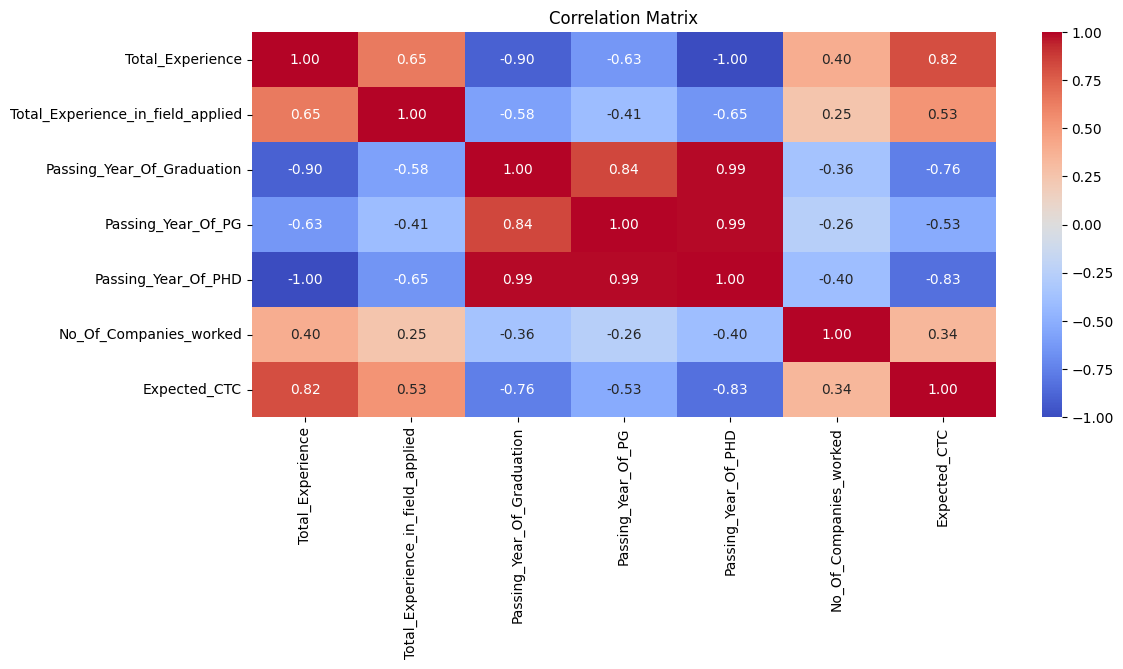

In [15]:
numerical_features = ['Total_Experience', 'Total_Experience_in_field_applied', 'Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD','No_Of_Companies_worked','Expected_CTC']

plt.figure(figsize=(12,5))
sns.heatmap(new_df[numerical_features].corr(),annot=True,fmt = '.2f',cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

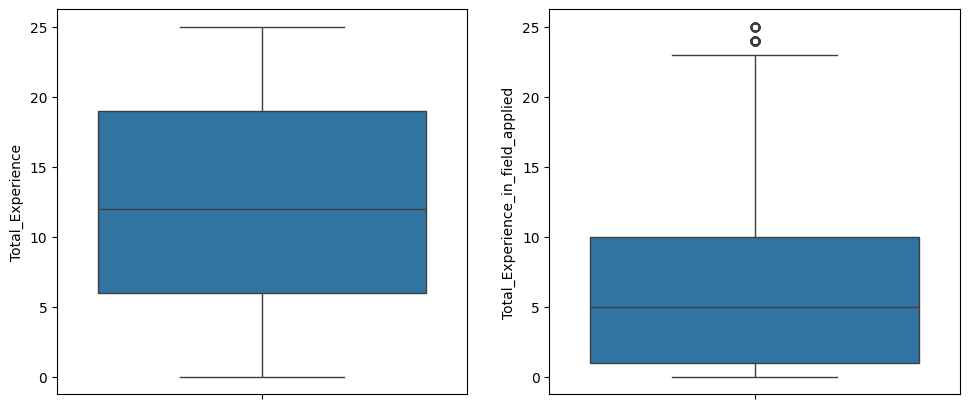

In [16]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(new_df['Total_Experience'])
plt.subplot(1,3,2)
sns.boxplot(new_df['Total_Experience_in_field_applied'])
plt.show()

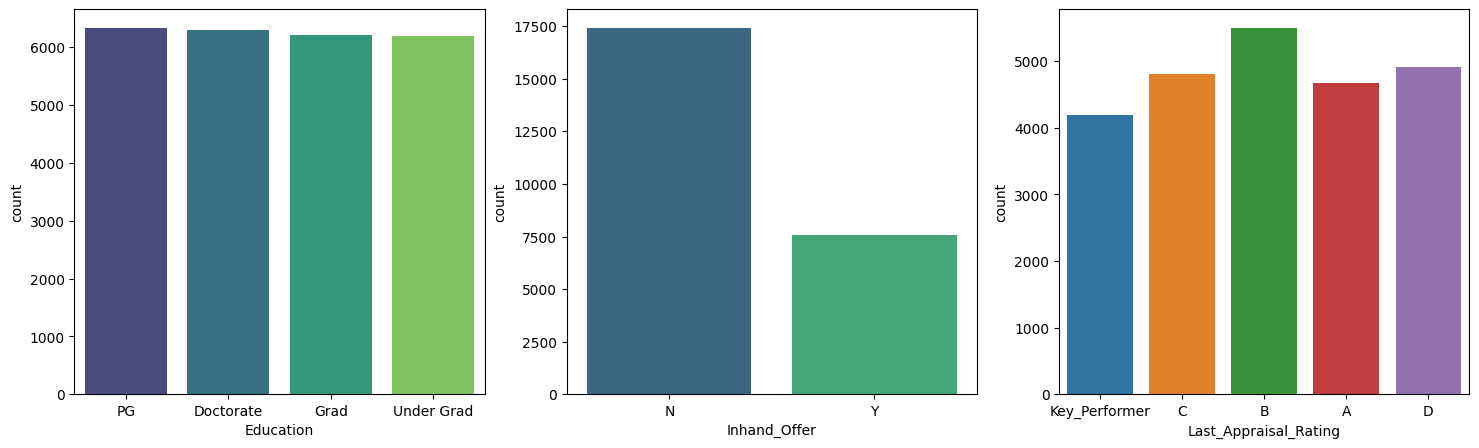

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x=new_df['Education'], hue=new_df['Education'], palette='viridis', legend=False)
plt.subplot(1,3,2)
sns.countplot(x=new_df['Inhand_Offer'],hue = new_df['Inhand_Offer'],palette = 'viridis',legend= False)
plt.subplot(1,3,3)
sns.countplot(x=new_df['Last_Appraisal_Rating'],hue = new_df['Last_Appraisal_Rating'],legend = False)
plt.show()

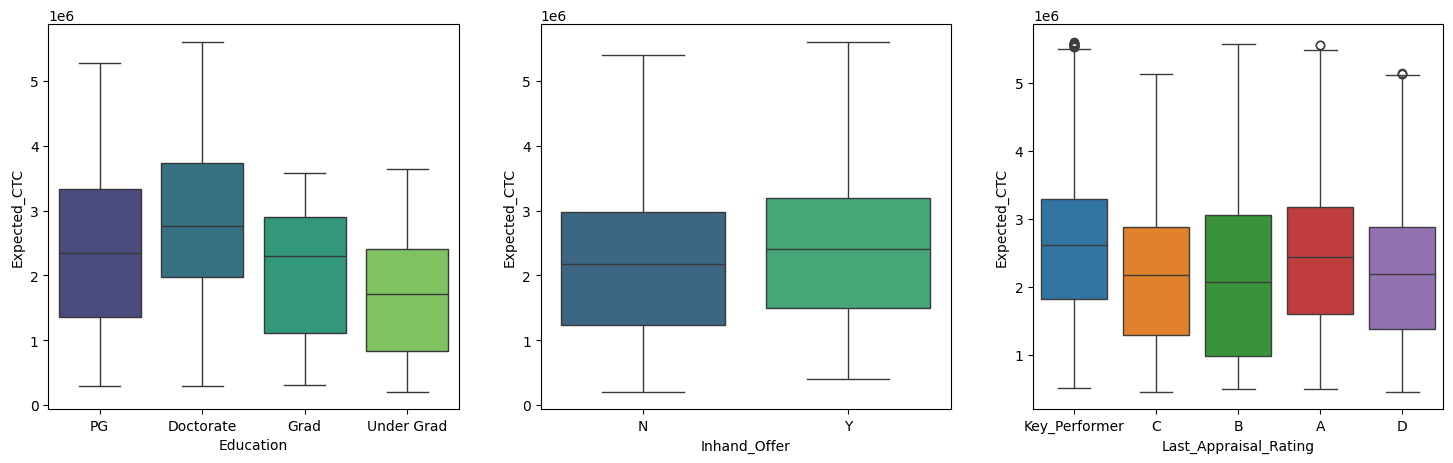

In [18]:

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(x=new_df['Education'],y= new_df['Expected_CTC'], hue=new_df['Education'], palette='viridis', legend=False)
plt.subplot(1,3,2)
sns.boxplot(x=new_df['Inhand_Offer'],y= new_df['Expected_CTC'],hue = new_df['Inhand_Offer'],palette = 'viridis',legend= False)
plt.subplot(1,3,3)
sns.boxplot(x=new_df['Last_Appraisal_Rating'],y= new_df['Expected_CTC'],hue = new_df['Last_Appraisal_Rating'],legend = False)

plt.show()

In [19]:
new_df[['Grad_Indicator','PG_Indicator','PHD_Indicator']]=new_df[['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']].isnull()

/tmp/ipython-input-3284444720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['Grad_Indicator','PG_Indicator','PHD_Indicator']]=new_df[['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']].isnull()
/tmp/ipython-input-3284444720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['Grad_Indicator','PG_Indicator','PHD_Indicator']]=new_df[['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']].isnull()
/tmp/ipython-input-3284444720.py:1: SettingWithCop

In [20]:
new_df.drop(['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD'],axis=1,inplace=True)

/tmp/ipython-input-863860885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD'],axis=1,inplace=True)


# **Spliting into Training data and Testing data**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Expected_CTC', axis=1), new_df['Expected_CTC'], test_size=0.2, random_state=42)

#**By using Column transformers and pipelines Creating a Preprocessor**

In [22]:
numerical_features = ['Total_Experience', 'Total_Experience_in_field_applied']
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
last_appraisal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[[ 'C', 'B', 'D', 'A', 'Key_Performer']]))
])


other_categorical_transformer = OrdinalEncoder(categories=[['N', 'Y'], ['Under Grad', 'Grad', 'PG', 'Doctorate']])
Categorical_features = ['Department','Role','Industry']
Categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
  #  ('encoder', OneHotEncoder(drop = 'first',handle_unknown = 'ignore',sparse_output = False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('last_appraisal_cat', last_appraisal_transformer, ['Last_Appraisal_Rating']),
        ('other_cat', other_categorical_transformer, ['Inhand_Offer', 'Education']),
        ('cat', Categorical_transformer, Categorical_features)
    ],
    remainder='passthrough'
)

In [23]:
rfe = CatBoostRegressor(cat_features=['cat__Department', 'cat__Role','cat__Industry'], verbose=1)

In [24]:
pipe = Pipeline(steps=[
  ('preprocessor',preprocessor),
])

# **Fiting the data using Pipeline**

In [25]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total_Experience',
                                                   'Total_Experience_in_field_applied']),
                                                 ('last_appraisal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['C',
                                                                                               'B',
                                                                                               'D',
                                                                                               'A',
                                                                                               'Key_Performer']]))]),
                                                  ['Last_Appraisal_Rating']),
                                                 ('other_cat',
                                                  OrdinalEncoder(categories=[['N',
                                                                              'Y'],
                                                                             ['Under '
                                                                              'Grad',
                                                                              'Grad',
                                                                              'PG',
                                                                              'Doctorate']]),
                                                  ['Inhand_Offer',
                                                   'Education']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Department', 'Role',
                                                   'Industry'])]))])

In [26]:
X_train_trf = pipe.transform(X_train)
X_train_trf = pd.DataFrame(X_train_trf,columns=pipe.get_feature_names_out())
X_test_trf = pipe.transform(X_test)
X_test_trf = pd.DataFrame(X_test_trf,columns=pipe.get_feature_names_out())

In [27]:
X_train_trf

,num__Total_Experience,num__Total_Experience_in_field_applied,last_appraisal_cat__Last_Appraisal_Rating,other_cat__Inhand_Offer,other_cat__Education,cat__Department,cat__Role,cat__Industry,remainder__No_Of_Companies_worked,remainder__Grad_Indicator,remainder__PG_Indicator,remainder__PHD_Indicator
0,-0.466022,-0.214791,3.0,1.0,3.0,Engineering,Scientist,Others,2,False,False,True
1,1.005513,2.017428,3.0,0.0,1.0,Education,Business Analyst,IT,6,False,False,False
2,1.406841,1.67401,1.0,0.0,1.0,IT-Software,Bio statistician,Analytics,3,False,False,False
3,0.604185,0.987173,3.0,0.0,0.0,Accounts,Analyst,Telecom,2,True,True,True
4,-1.402453,-0.901628,1.0,0.0,1.0,Marketing,Associate,IT,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.536229,-1.073337,1.0,0.0,1.0,Marketing,Associate,Retail,3,False,True,True
19996,-0.332246,-0.729919,2.0,0.0,0.0,Marketing,Consultant,FMCG,3,True,True,True
19997,1.005513,-0.729919,2.0,0.0,3.0,Analytics/BI,Data scientist,Telecom,3,False,False,False
19998,1.139289,2.189138,4.0,0.0,2.0,Marketing,Financial Analyst,Automobile,4,False,False,True


#**Training the model**

In [28]:
model = rfe.fit(X_train_trf,y_train, cat_features=['cat__Department','cat__Role','cat__Industry'] ,early_stopping_rounds=50)

Learning rate set to 0.065727
0:	learn: 1098545.9452390	total: 61.5ms	remaining: 1m 1s
1:	learn: 1041665.6888311	total: 72.2ms	remaining: 36s
2:	learn: 989439.5588280	total: 87.8ms	remaining: 29.2s
3:	learn: 939775.9162271	total: 101ms	remaining: 25.1s
4:	learn: 894366.7755581	total: 116ms	remaining: 23s
5:	learn: 851468.0661899	total: 129ms	remaining: 21.3s
6:	learn: 813127.9722130	total: 142ms	remaining: 20.2s
7:	learn: 779224.6506268	total: 155ms	remaining: 19.2s
8:	learn: 745675.1324101	total: 165ms	remaining: 18.2s
9:	learn: 716136.4958044	total: 177ms	remaining: 17.5s
10:	learn: 687261.5851532	total: 190ms	remaining: 17.1s
11:	learn: 660945.1866344	total: 204ms	remaining: 16.8s
12:	learn: 637290.7068190	total: 216ms	remaining: 16.4s
13:	learn: 616548.7372312	total: 228ms	remaining: 16.1s
14:	learn: 597901.4050449	total: 242ms	remaining: 15.9s
15:	learn: 580121.0342726	total: 253ms	remaining: 15.5s
16:	learn: 564921.1672019	total: 266ms	remaining: 15.4s
17:	learn: 549511.5979399	t

#**Predicting the values**

In [29]:
y_train_pred = model.predict(X_train_trf)
y_test_pred = model.predict(X_test_trf)

# **Model Evaluation using some metrics**

In [30]:
rfe_r2_train = r2_score(y_train,y_train_pred)
print(f"Training R2_Score : {rfe_r2_train}")
rfe_r2_test = r2_score(y_test,y_test_pred)
mae = mean_absolute_error(y_train,y_train_pred)
mse = mean_squared_error(y_train,y_train_pred)
mde = median_absolute_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
print(f"Training Mean Absloute Error : {mae}")
print(f"Training Median Absloute Error : {mde}")
print(f"Training Mean Squared Error : {mse}")
print(f"Training RMSE : {rmse}")
print(f"Testing R2_Score : {rfe_r2_test}")
adusted_r2_test = 1 - (1-rfe_r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"Adjusted R2_score : {adusted_r2_test}")
maet = mean_absolute_error(y_test,y_test_pred)
mset = mean_squared_error(y_test,y_test_pred)
mdet = median_absolute_error(y_test,y_test_pred)
rmset = np.sqrt(mset)
print(f"Testing Mean Absloute Error : {maet}")
print(f"Testing Median Absloute Error : {mdet}")
print(f"Testing Mean Squared Error : {mset}")
print(f"Testing RMSE : {rmset}")



Training R2_Score : 0.909560181967328
Training Mean Absloute Error : 256908.657224706
Training Median Absloute Error : 180798.51987670013
Training Mean Squared Error : 121658859391.4725
Training RMSE : 348796.30071357195
Testing R2_Score : 0.9009132460554979
Adjusted R2_score : 0.9006748179329124
Testing Mean Absloute Error : 266523.41225556086
Testing Median Absloute Error : 183061.22631635086
Testing Mean Squared Error : 134012484943.5082
Testing RMSE : 366077.1570905623


# **Model Evaluation through Visualization**

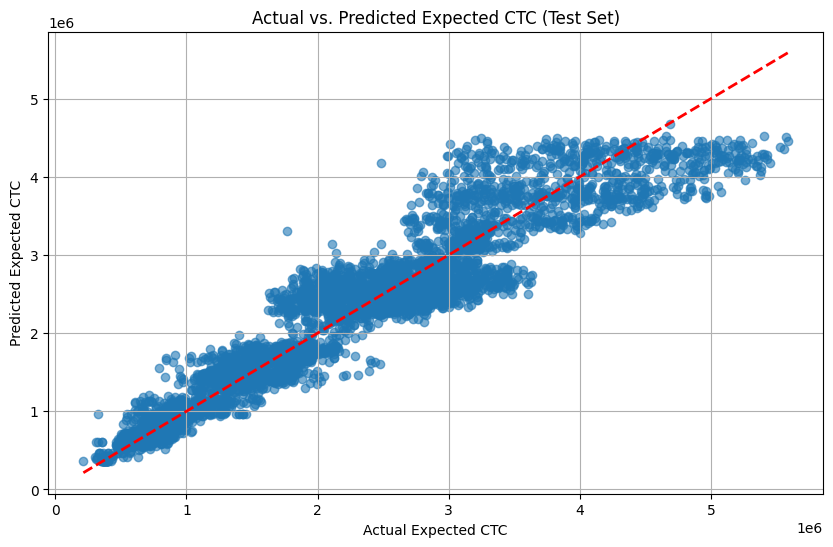

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Expected CTC')
plt.ylabel('Predicted Expected CTC')
plt.title('Actual vs. Predicted Expected CTC (Test Set)')
plt.grid(True)
plt.show()

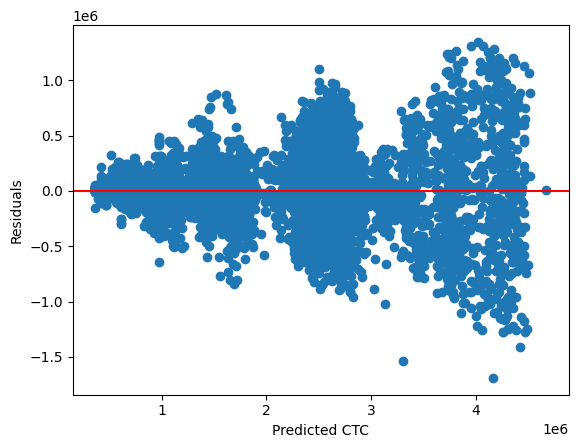

In [32]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.show()


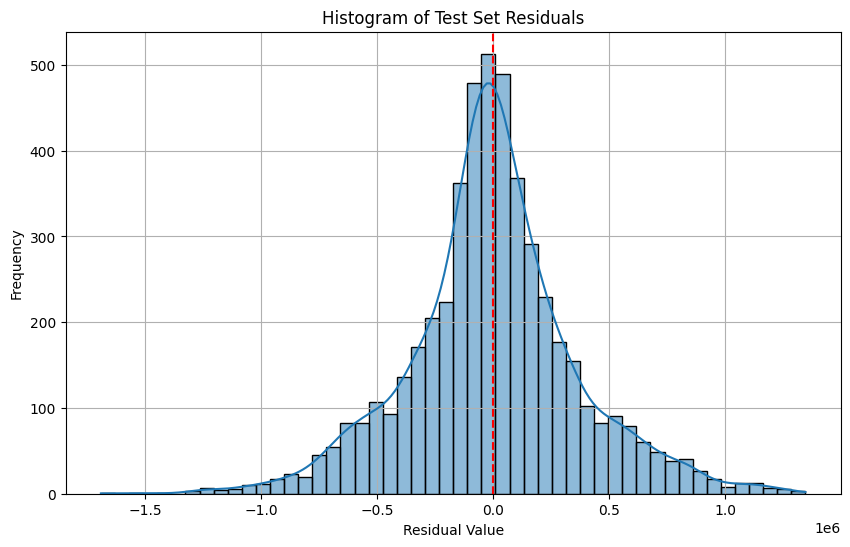

In [33]:
residuals = y_test - y_test_pred

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Histogram of Test Set Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

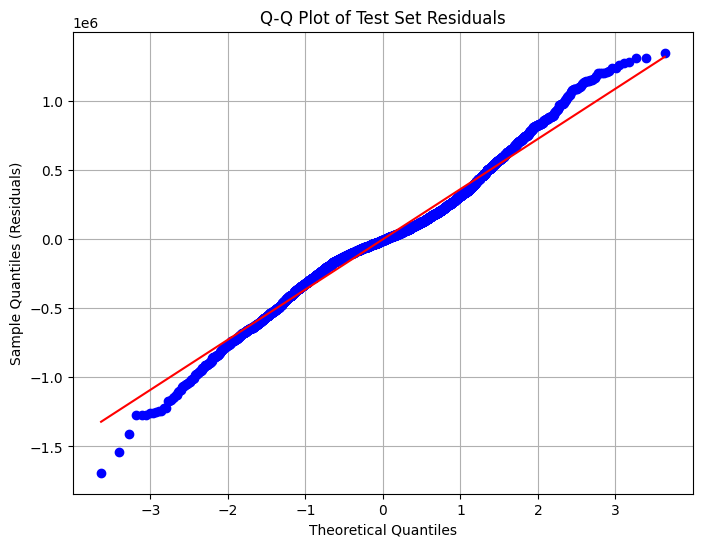

In [34]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Test Set Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles (Residuals)')
plt.grid(True)
plt.show()

# **Hyperparameter Tuning using GridSearchCV**

In [35]:
param_grid = {
    'iterations':[100,300,500],
    'depth':[5,7,10],
    'learning_rate':[0.05,0.1,0.3]
}

grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')


grid_search.fit(X_train_trf, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 1067033.2674600	total: 19.4ms	remaining: 5.81s
1:	learn: 983047.7205889	total: 37.9ms	remaining: 5.65s
2:	learn: 906687.2753334	total: 53.2ms	remaining: 5.27s
3:	learn: 839770.8029819	total: 72.1ms	remaining: 5.33s
4:	learn: 781485.5349424	total: 88.7ms	remaining: 5.23s
5:	learn: 729583.8878743	total: 106ms	remaining: 5.17s
6:	learn: 683585.7096061	total: 120ms	remaining: 5.04s
7:	learn: 646781.1936702	total: 137ms	remaining: 5s
8:	learn: 610729.0213854	total: 153ms	remaining: 4.94s
9:	learn: 584002.4799088	total: 161ms	remaining: 4.67s
10:	learn: 557304.9050580	total: 176ms	remaining: 4.61s
11:	learn: 534207.4127234	total: 191ms	remaining: 4.58s
12:	learn: 514562.8091750	total: 207ms	remaining: 4.56s
13:	learn: 496218.4239304	total: 224ms	remaining: 4.57s
14:	learn: 481328.9828569	total: 240ms	remaining: 4.57s
15:	learn: 468287.7393219	total: 256ms	remaining: 4.54s
16:	learn: 457201.0827370	total: 270ms	remaining: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7e4e67d7c500>,
             n_jobs=-1,
             param_grid={'depth': [5, 7, 10], 'iterations': [100, 300, 500],
                         'learning_rate': [0.05, 0.1, 0.3]},
             scoring='r2', verbose=2)

In [36]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best R2 score found: {grid_search.best_score_}")

best_rfe_model = grid_search.best_estimator_


Best parameters found: {'depth': 7, 'iterations': 300, 'learning_rate': 0.1}
Best R2 score found: 0.8972812673645993


# **Best model Metrics**

In [37]:
# Evaluate the best model on the test set
y_train_pred_best = best_rfe_model.predict(X_train_trf)
r2_train_best = r2_score(y_train, y_train_pred_best)
mae_train_best = mean_absolute_error(y_train, y_train_pred_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))

print(f"R2 Score (Best Model on Train Set): {r2_train_best}")
print(f"MAE (Best Model on Train Set): {mae_train_best}")
print(f"RMSE (Best Model on Train Set): {rmse_train_best}")

y_pred_best = best_rfe_model.predict(X_test_trf)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"R2 Score (Best Model on Test Set): {r2_best}")
print(f"MAE (Best Model on Test Set): {mae_best}")
print(f"RMSE (Best Model on Test Set): {rmse_best}")


R2 Score (Best Model on Train Set): 0.9077558211155512
MAE (Best Model on Train Set): 259174.38711181117
RMSE (Best Model on Train Set): 352258.5271802557
R2 Score (Best Model on Test Set): 0.9009570143621752
MAE (Best Model on Test Set): 266498.75657152664
RMSE (Best Model on Test Set): 365996.2969029317


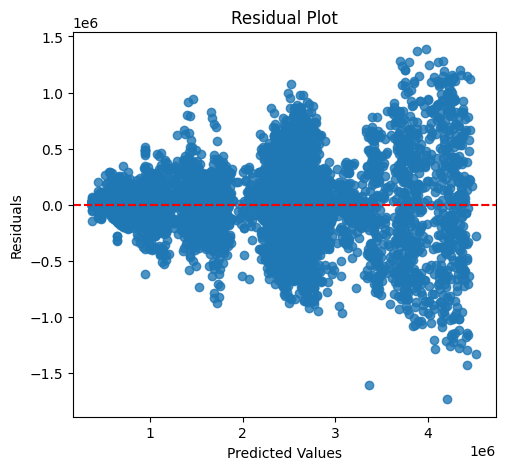

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.residplot(x=y_pred_best,y=y_test-y_pred_best)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

#**Feature Importance**

In [39]:
Top_Features = best_rfe_model.feature_importances_
feature_names = X_train_trf.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': Top_Features})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
display(importance_df.head(10))

Top 10 Feature Importances:


,Feature,Importance
0,num__Total_Experience,53.886885
4,other_cat__Education,23.203684
5,cat__Department,7.386446
2,last_appraisal_cat__Last_Appraisal_Rating,6.105283
9,remainder__Grad_Indicator,2.858932
10,remainder__PG_Indicator,1.849741
1,num__Total_Experience_in_field_applied,1.150000
6,cat__Role,1.132027
7,cat__Industry,0.886846
8,remainder__No_Of_Companies_worked,0.627377


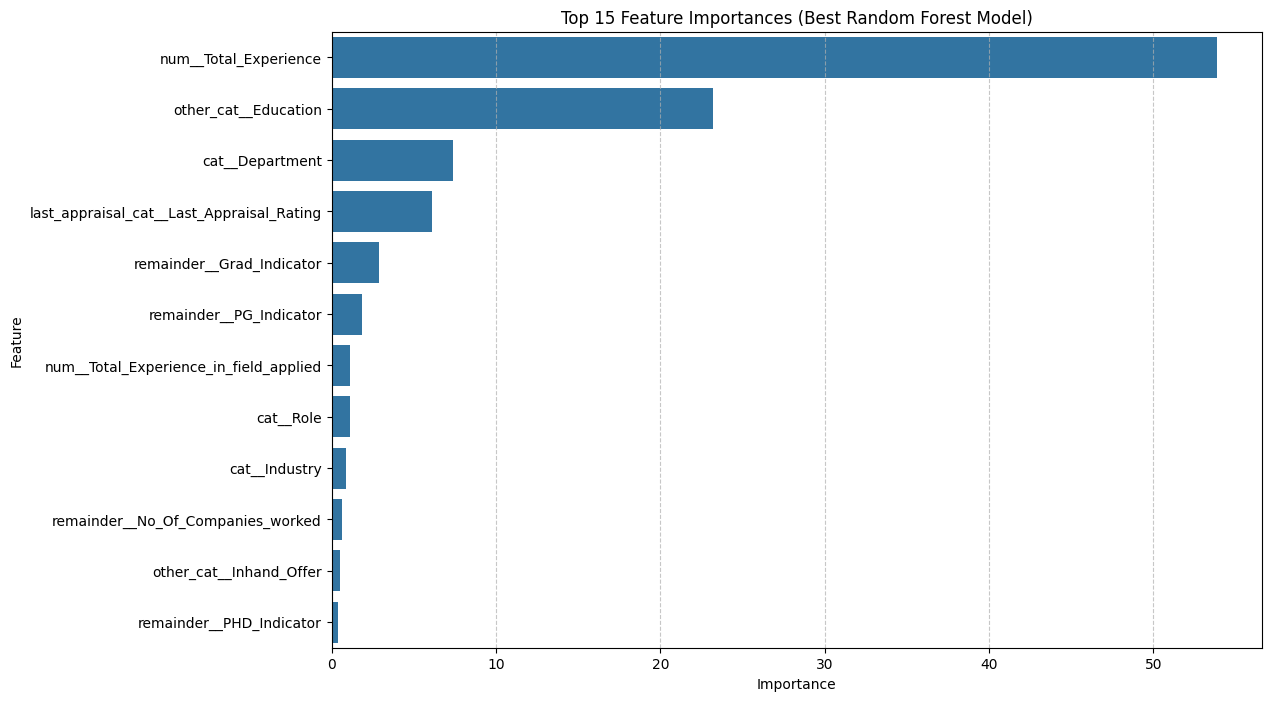

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances (Best Random Forest Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# **Fairness test for our Best Model**

In [41]:
X_test_for_fairness = X_test.copy()

sensitive_feature = ['Education','Department']
imputer_sensitive_features = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['Last_Appraisal_Rating', 'Department', 'Role']
X_test_for_fairness[columns_to_impute] = imputer_sensitive_features.fit_transform(
    X_test_for_fairness[columns_to_impute]
)
metric_fns = {
    'MAE': mean_absolute_error,
    'MDSE': median_absolute_error,
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'Mean Percentage Error': lambda y_true, y_pred: np.mean((y_pred-y_true)/y_true)*100,
    'R2': r2_score
}


grouped_metric_frame = MetricFrame(
    metrics=metric_fns,
    y_true=y_test,
    y_pred=y_test_pred,
    sensitive_features=X_test_for_fairness[sensitive_feature], # Use the imputed DataFrame for sensitive features
)
fair = pd.DataFrame(grouped_metric_frame.by_group)
counts = (
    X_test_for_fairness[sensitive_feature[0]]
    .value_counts()
    .rename('count')
)

fair = fair.merge(counts, left_index=True, right_index=True)
fair

MAE           MDSE           MSE  \
Education  Department                                                   
Doctorate  Accounts        382274.152055  269336.642781  2.525423e+11   
           Analytics/BI    363879.639255  321439.581250  2.050554e+11   
           Banking         403084.622301  323835.670493  2.569606e+11   
           Education       436004.663849  345979.713909  3.057948e+11   
           Engineering     377616.415785  296869.969107  2.548923e+11   
           HR              428103.694135  316794.931950  3.024912e+11   
           Healthcare      379101.709186  320003.009235  2.356986e+11   
           IT-Software     442289.417451  385069.403776  3.013393e+11   
           Marketing       323518.775385  256976.063262  1.801456e+11   
           Others          392530.614825  332590.617652  2.502638e+11   
           Sales           388655.653780  319946.766869  2.297970e+11   
           Top Management  477786.804550  456803.164418  3.133872e+11   
Grad       Accounts        158150.502578  144808.456357  3.700239e+10   
           Analytics/BI    123063.393254  107035.403785  2.448749e+10   
           Banking         120543.065901   88463.429429  2.568774e+10   
           Education       150117.867509   96301.269069  4.173574e+10   
           Engineering     133343.441256  106826.921223  2.846332e+10   
           HR              135871.971344  109188.349339  3.158002e+10   
           Healthcare      157441.566424  111638.287136  4.370755e+10   
           IT-Software     117446.368175   91869.282770  2.545168e+10   
           Marketing       104557.786858   74951.665394  2.067972e+10   
           Others          129796.940650   94453.539305  2.916721e+10   
           Sales           103790.309522   77777.852262  1.882426e+10   
           Top Management  127811.033711  105564.690629  2.760844e+10   
PG         Accounts        128153.303873  122710.359776  2.662335e+10   
           Analytics/BI    315951.804187  251631.167532  1.500713e+11   
           Banking         300950.224439  255109.123012  1.371961e+11   
           Education       234554.761529  158572.097536  1.015491e+11   
           Engineering     288978.835110  250504.263944  1.295717e+11   
           HR              290507.008487  251521.689103  1.332548e+11   
           Healthcare      325755.589086  227618.568700  1.957885e+11   
           IT-Software     334026.483710  266271.895178  1.669274e+11   
           Marketing       225934.796564  149929.118266  9.802797e+10   
           Others          336450.786807  287627.275446  1.682982e+11   
           Sales           298829.921713  250385.521700  1.407592e+11   
           Top Management  390342.949517  401085.735059  2.056441e+11   
Under Grad Accounts        278972.339573  205453.693296  1.443397e+11   
           Analytics/BI    262144.325272  190154.467939  1.215466e+11   
           Banking         257090.308037  186892.003332  1.171386e+11   
           Education       273571.958652  201320.420835  1.227416e+11   
           Engineering     269841.733761  225095.666089  1.258058e+11   
           HR              251406.838455  193027.495961  1.117267e+11   
           Healthcare      291993.833273  187390.535917  1.458497e+11   
           IT-Software     311786.637539  209572.661733  1.637759e+11   
           Marketing       208201.875933  122360.305153  9.479302e+10   
           Others          276846.426091  189075.916964  1.319764e+11   
           Sales           252170.300144  179180.500281  1.169237e+11   
           Top Management  350148.000089  299583.175625  1.839018e+11   

                                    RMSE  Mean Percentage Error        R2  \
Education  Department                                                       
Doctorate  Accounts        502535.875245               2.448858  0.836805   
           Analytics/BI    452830.378254               2.579826  0.869131   
           Banking         506912.859584               3.525441  0.818111   
 

In [42]:
fair.describe()

,MAE,MDSE,MSE,RMSE,Mean Percentage Error,R2,count
count,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000
mean,273153.988575,217012.465412,1.391041e+11,350440.264800,2.501552,0.866818,1250.000000
std,105730.214627,95842.191459,8.806069e+10,129005.438441,2.297217,0.080788,33.767667
min,103790.309522,74951.665394,1.882426e+10,137201.537633,-2.042988,0.578199,1205.000000
25%,157973.268539,122622.846120,4.321460e+10,207870.957430,0.882992,0.817791,1234.250000
50%,283975.587342,207513.177515,1.326156e+11,364163.198011,2.514342,0.864378,1248.000000
75%,353580.909880,289937.948861,1.981052e+11,445067.588253,4.009704,0.927193,1263.750000
max,477786.804550,456803.164418,3.133872e+11,559810.000688,7.707948,0.981371,1299.000000


# **Salary Band Analysis for Similar Profiles**

In [43]:
df1 = X_test_for_fairness.copy()
df1['Expected_CTC'] = y_test
df1['Predicted_CTC'] = y_test_pred
df1['Experience_Band'] = pd.cut(
    df1['Total_Experience'],
    bins=[0, 2, 5, 10,20],
    labels=['0-2', '2-5', '5-10','10+']
)
cols = ['Experience_Band','Education']
salary_Band_Analysis = (
    df1
    .groupby(cols,observed = True)['Predicted_CTC']
    .agg(['count','mean','min','max','std','median'])
    .reset_index()
)
salary_Band_Analysis['Salary_range'] = (salary_Band_Analysis['max']  -  salary_Band_Analysis['min'])
salary_Band_Analysis['CV'] = salary_Band_Analysis['std']/salary_Band_Analysis['mean']
salary_Band_Analysis


,Experience_Band,Education,count,mean,min,max,std,median,Salary_range,CV
0,0-2,Doctorate,88,9.220268e+05,7.901731e+05,1.045772e+06,55449.884046,9.226764e+05,2.555986e+05,0.060139
1,0-2,Grad,101,6.183044e+05,5.373134e+05,6.985750e+05,39616.761771,6.169094e+05,1.612616e+05,0.064073
2,0-2,PG,102,6.964702e+05,4.736040e+05,8.661796e+05,79942.889056,7.032557e+05,3.925756e+05,0.114783
3,0-2,Under Grad,91,5.827149e+05,5.177101e+05,6.919995e+05,38963.449560,5.746014e+05,1.742894e+05,0.066865
4,2-5,Doctorate,140,1.538641e+06,1.351119e+06,1.795126e+06,107714.814370,1.510372e+06,4.440070e+05,0.070006
5,2-5,Grad,142,7.572255e+05,6.374057e+05,8.920632e+05,62159.248346,7.618267e+05,2.546575e+05,0.082088
6,2-5,PG,149,1.088704e+06,6.193482e+05,1.578053e+06,228862.562887,1.044746e+06,9.587048e+05,0.210216
7,2-5,Under Grad,157,6.700613e+05,5.561567e+05,7.638272e+05,43268.341959,6.746632e+05,2.076705e+05,0.064574
8,5-10,Doctorate,229,2.408265e+06,2.077083e+06,2.722086e+06,126787.908337,2.397989e+06,6.450027e+05,0.052647
9,5-10,Grad,250,1.543827e+06,9.150975e+05,2.495889e+06,336171.199133,1.442106e+06,1.580791e+06,0.217752


In [44]:
salary_Band_Analysis.describe()

,count,mean,min,max,std,median,Salary_range,CV
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,16.000000
mean,241.125000,1.566622e+06,1.123899e+06,2.078457e+06,246473.159203,1.504364e+06,9.545580e+05,0.136580
std,151.584905,9.071185e+05,6.084926e+05,1.277765e+06,224635.174486,8.345110e+05,7.769407e+05,0.070673
min,88.000000,5.827149e+05,4.736040e+05,6.919995e+05,38963.449560,5.746014e+05,1.612616e+05,0.052647
25%,130.500000,7.420366e+05,6.035503e+05,8.855923e+05,60481.907271,7.471840e+05,2.553633e+05,0.066292
50%,193.000000,1.404452e+06,9.257526e+05,1.817320e+06,177825.235612,1.292543e+06,7.740544e+05,0.127182
75%,307.750000,2.271890e+06,1.612237e+06,2.791479e+06,361395.260560,2.404233e+06,1.553533e+06,0.206342
max,508.000000,3.282547e+06,2.274600e+06,4.522370e+06,739071.394499,2.839683e+06,2.564945e+06,0.225152


# **Verify With SHAP Values**

In [45]:
explainer = shap.TreeExplainer(best_rfe_model)
shap_values = explainer.shap_values(X_test_trf)
shap_values


array([[ 8.67736653e+05,  2.24767584e+03,  1.57398805e+05, ...,
        -9.70223489e+04, -6.43074853e+04, -6.86585677e+03],
       [-5.17766776e+05,  7.40013626e+03, -2.51287426e+04, ...,
         2.75201332e+04,  2.04870931e+04,  1.30269460e+03],
       [ 1.12357395e+06,  3.68862703e+03,  3.47249672e+04, ...,
         4.83852893e+04,  2.29907618e+04, -6.77834780e+02],
       ...,
       [-8.49771669e+05,  3.55797783e+03,  1.68917733e+05, ...,
         3.83954298e+04,  2.74946759e+04,  1.77080175e+03],
       [ 1.10624290e+06,  5.61121749e+03, -1.81759907e+05, ...,
         4.70439126e+04,  2.03389191e+04,  2.62297189e+03],
       [-1.15193141e+05,  4.07859478e+03,  1.01516163e+05, ...,
         3.82341107e+04,  2.47735210e+04,  2.84469936e+03]])

# **Summary Plot**

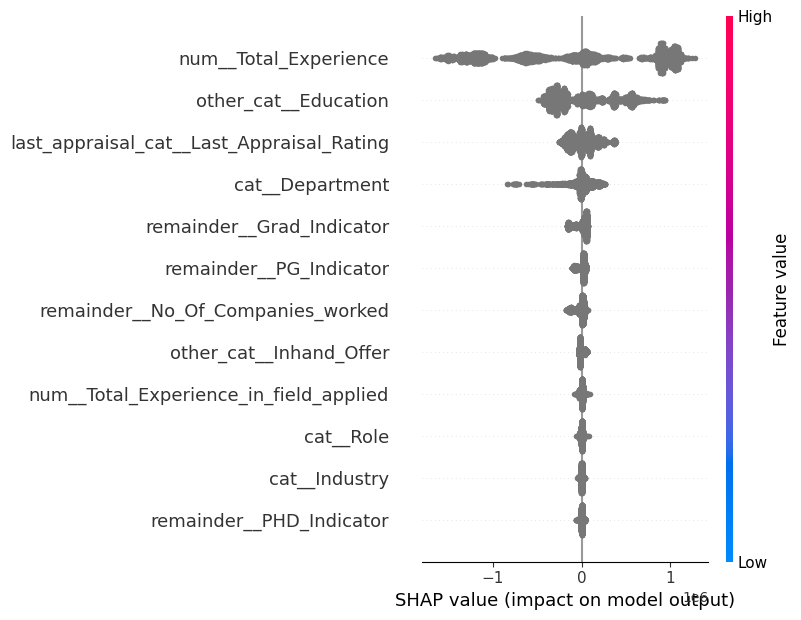

In [46]:
shap.summary_plot(shap_values, X_test_trf)

# **Converting into JSON file**

In [47]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(best_rfe_model,open('model.pkl','wb'))
